### Seam Carving

![Original Image]("images/gray.jpg")

  1. Preprocess Steps
    1. Read in Image
    2. Gray Scale Image
    3. Blur Image<br><br>
  2. Find Energy Map
    1. Edge Image
    2. Energy Map

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

def preprocess(img_name):
    img = mpimg.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5), 2)
    return img, blurred

def edge(gray):
    sobel_x = np.abs(cv2.Sobel(gray, 3, 1, 0)).astype(np.uint32)
    sobel_y = np.abs(cv2.Sobel(gray, 3, 0, 1)).astype(np.uint32)
    sobel = np.clip(np.sqrt(np.square(sobel_x)+np.square(sobel_y)), 0, 255).astype(np.uint8)
    return sobel

def produce_emp(edge):
    h, w = edge.shape
    result_edge = np.zeros((h,w))
    result_edge[0,:] = edge[0,:]
    result_edge[-1,:] = edge[-1,:]
    for i in range(1, h):
        current = edge[i, :]
        next_ = edge[i, :]
        for j in range(w):
            left = max(0, j-1)
            right = min(j+1, w-1)
            result_edge[i, j] = np.min(result_edge[i-1, left:right] + next_[j])
    result_edge = (result_edge/np.max(result_edge))
    return result_edge


def find_seam(emp, start=400):
    h, w = emp.shape
    current = start
    result = [current]
    for i in range(h-2, -1, -1):
        left = max(0, current-1)
        right = min(current+1, w-1)
        current += np.argmin(emp[i, left:right]) - 1
        current = max(0, min(current, w-1))
        result.append(current)
    return np.array(result)

def remove_seam(img, emp, seam_index):
    h, w, d = img.shape
    img_ = np.zeros((h, w-1, d), dtype=np.uint8)
    emp_ = np.zeros((h, w-1))
    for i in range(len(seam_index)):
        seam_ = seam_index[i]
        img_[h-(i+1), :seam_, :] = img[h-(i+1), :seam_, :]
        img_[h-(i+1), seam_:, :] = img[h-(i+1), seam_+1:, :]
        emp_[h-(i+1), :seam_] = emp[h-(i+1), :seam_]
        emp_[h-(i+1), seam_:] = emp[h-(i+1), seam_+1:]
    return img_, emp_

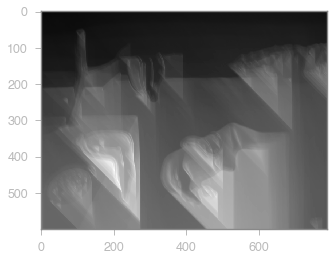

In [11]:
import cv2
img_name = 'paint.jpg'
img, gray = preprocess(img_name)
sobel = edge(gray)
emp = produce_emp(sobel)
emp = np.uint(emp*255)
plt.imshow(emp, cmap='gray')
cv2.imwrite('emp.jpg', emp)
plt.show()

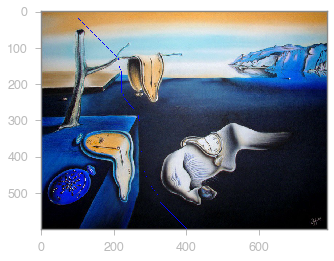

In [18]:
seam = find_seam(emp)
h, w = emp.shape
height = [h-(i+1) for i in range(h)]
img_ = np.copy(img)
img_[height, seam, :] = [0,0,255]
# img_[height, seam+1, :] = [255, 0, 0]
cv2.imwrite('seam.jpg', img_)
plt.imshow(img_)
plt.show()